# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        city_list.append(city)
        lat_list.append(city_lat)
        lng_list.append(city_lng)
        max_temp_list.append(city_max_temp)
        humidity_list.append(city_humidity)
        cloudiness_list.append(city_clouds)
        wind_speed_list.append(city_wind)
        country_list.append(city_country)
        date_list.append(city_date)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | skadovs'k
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | adrar
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | kill devil hills
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | ta`u
Processing Record 12 of Set 1 | olyokminsk
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | el porvenir
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | i-n-salah
Processing Record 20 of Set 1 | pujehun
Processing Record 21 of Set 1 | raja
Processing Record 22 of Set 1 | hithadhoo


Processing Record 39 of Set 4 | port saint john's
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | yelizovo
Processing Record 42 of Set 4 | al wafrah
Processing Record 43 of Set 4 | kenai
Processing Record 44 of Set 4 | corning
Processing Record 45 of Set 4 | nuestra senora del rosario de caa cati
Processing Record 46 of Set 4 | ca mau
Processing Record 47 of Set 4 | bure
Processing Record 48 of Set 4 | fallon
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | perevoz
Processing Record 1 of Set 5 | tolanaro
Processing Record 2 of Set 5 | jijiga
Processing Record 3 of Set 5 | ocean pointe
City not found. Skipping...
Processing Record 4 of Set 5 | vadso
Processing Record 5 of Set 5 | bom jesus
Processing Record 6 of Set 5 | tanrake village
City not found. Skipping...
Processing Record 7 of Set 5 | cable beach
City not found. Skipping...
Processing Record 8 of Set 5 | mugia
Processing Record 9 of Set 5 | tazovsky
Processing Record 10 of Set 5 |

Processing Record 26 of Set 8 | san lorenzo de esmeraldas
Processing Record 27 of Set 8 | argo
Processing Record 28 of Set 8 | shagonar
Processing Record 29 of Set 8 | castillos
Processing Record 30 of Set 8 | formiga
Processing Record 31 of Set 8 | uige
Processing Record 32 of Set 8 | sovetskiy
Processing Record 33 of Set 8 | queenstown
Processing Record 34 of Set 8 | mejit
Processing Record 35 of Set 8 | goshaingaon
Processing Record 36 of Set 8 | kerikeri
Processing Record 37 of Set 8 | beli
Processing Record 38 of Set 8 | ujae
Processing Record 39 of Set 8 | colonia
Processing Record 40 of Set 8 | chanal
Processing Record 41 of Set 8 | sao joao da barra
Processing Record 42 of Set 8 | twon-brass
Processing Record 43 of Set 8 | arvayheer
Processing Record 44 of Set 8 | opuwo
Processing Record 45 of Set 8 | lamar
Processing Record 46 of Set 8 | abraham's bay
City not found. Skipping...
Processing Record 47 of Set 8 | amble
Processing Record 48 of Set 8 | apolinario saravia
Processing

Processing Record 16 of Set 12 | cova figueira
Processing Record 17 of Set 12 | hami
Processing Record 18 of Set 12 | bukittinggi
Processing Record 19 of Set 12 | bouarfa
Processing Record 20 of Set 12 | wuchang
Processing Record 21 of Set 12 | sebring
Processing Record 22 of Set 12 | tostado
Processing Record 23 of Set 12 | sabang
Processing Record 24 of Set 12 | homeland park
Processing Record 25 of Set 12 | vernon
Processing Record 26 of Set 12 | turtas
Processing Record 27 of Set 12 | yagry
City not found. Skipping...
Processing Record 28 of Set 12 | kayyerkan
Processing Record 29 of Set 12 | pacific grove
Processing Record 30 of Set 12 | san antonio de pale
Processing Record 31 of Set 12 | cairns city
City not found. Skipping...
Processing Record 32 of Set 12 | panaba
Processing Record 33 of Set 12 | mogadishu
Processing Record 34 of Set 12 | kudahuvadhoo
Processing Record 35 of Set 12 | nevel'
Processing Record 36 of Set 12 | ciudad de armeria
Processing Record 37 of Set 12 | bei

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list
})

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,45.39,67,78,10.11,NZ,1690347432
1,skadovs'k,46.1161,32.9112,77.41,69,19,20.20,UA,1690347432
2,port-aux-francais,-49.3500,70.2167,38.01,96,88,30.24,TF,1690347433
3,adamstown,-25.0660,-130.1015,72.12,77,98,36.80,PN,1690347433
4,waitangi,-43.9535,-176.5597,46.81,94,99,23.71,NZ,1690347433


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,45.39,67,78,10.11,NZ,1690347432
1,skadovs'k,46.1161,32.9112,77.41,69,19,20.20,UA,1690347432
2,port-aux-francais,-49.3500,70.2167,38.01,96,88,30.24,TF,1690347433
3,adamstown,-25.0660,-130.1015,72.12,77,98,36.80,PN,1690347433
4,waitangi,-43.9535,-176.5597,46.81,94,99,23.71,NZ,1690347433


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

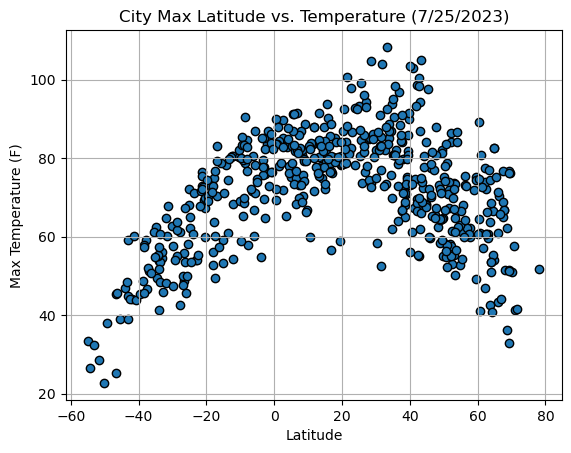

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (7/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

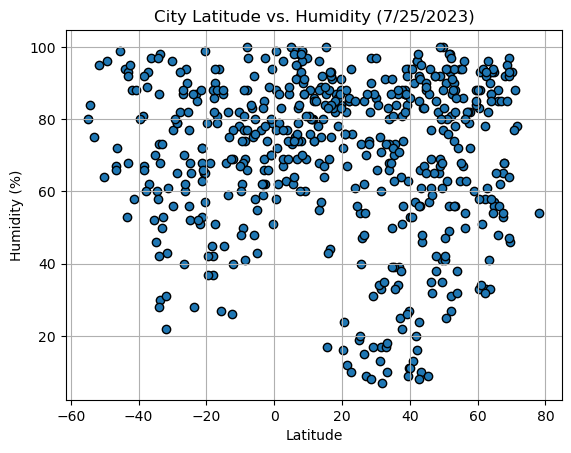

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (7/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

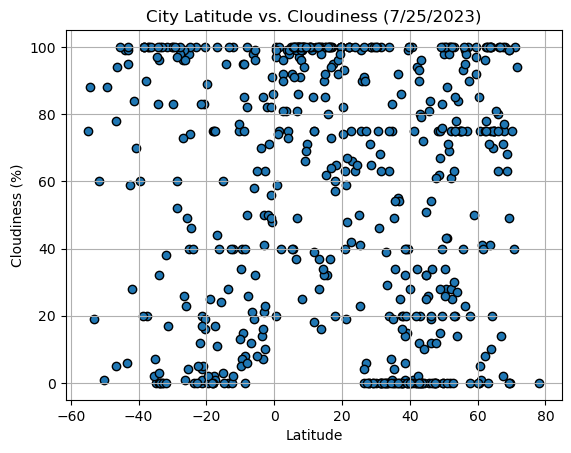

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (7/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

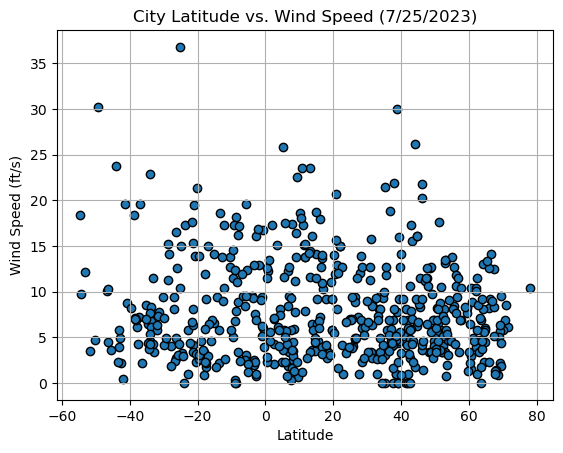

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (7/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (ft/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,skadovs'k,46.1161,32.9112,77.41,69,19,20.20,UA,1690347432
5,ilulissat,69.2167,-51.1000,32.86,97,49,2.17,GL,1690347433
6,adrar,20.5022,-10.0711,92.62,24,93,11.88,MR,1690347433
7,hamilton,39.1834,-84.5333,75.22,84,15,4.38,US,1690347188
8,kill devil hills,36.0307,-75.6760,81.99,84,0,5.75,US,1690347434


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,45.39,67,78,10.11,NZ,1690347432
2,port-aux-francais,-49.3500,70.2167,38.01,96,88,30.24,TF,1690347433
3,adamstown,-25.0660,-130.1015,72.12,77,98,36.80,PN,1690347433
4,waitangi,-43.9535,-176.5597,46.81,94,99,23.71,NZ,1690347433
9,invercargill,-46.4000,168.3500,45.64,72,94,10.27,NZ,1690347434


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5189599553689472


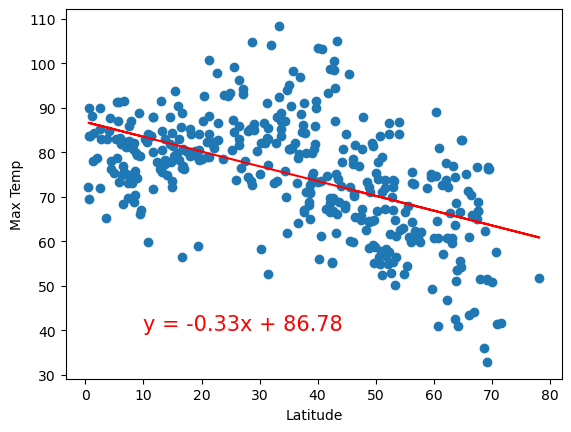

In [27]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.828121298345863


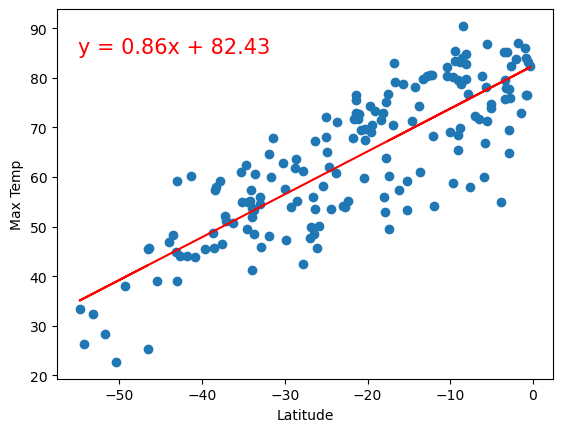

In [16]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

ANALYSIS: The absolute value of the r-values for each relationship here is pretty high, which suggests that there is a strong linear association between latitude and max temp. As latitude increases in the Northern Hemisphere, temperature decreases. And as latitude increases (approaches zero) in the Southern Hemisphere, temperature increases. These two graphs show that when latitude is near zero (close to the equator), temperatures are high.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10510963214105576


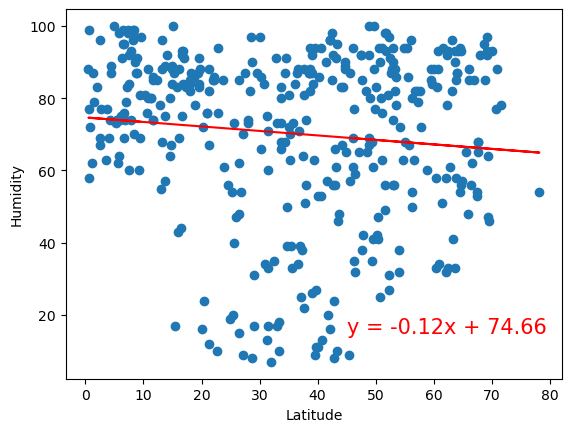

In [17]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.061926198059823495


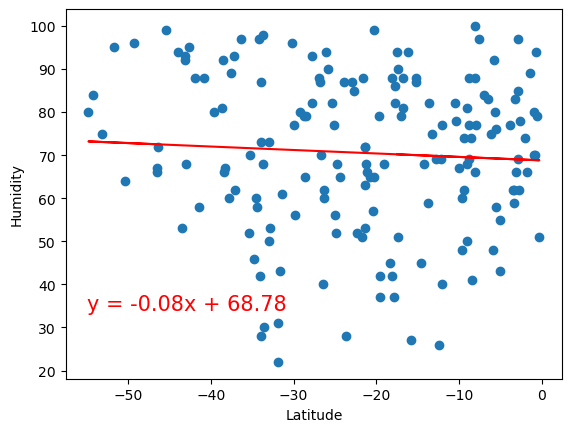

In [29]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,34),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

ANALYSIS: There is a weak linear relationship between latitude and humidity. This is demonstrated by the r-values between the two variables being so close to 0. The linear regression line is pretty flat in both graphs, which also suggests that the relationship between latitude and humidity has no consistent linear component.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.24761437059283817


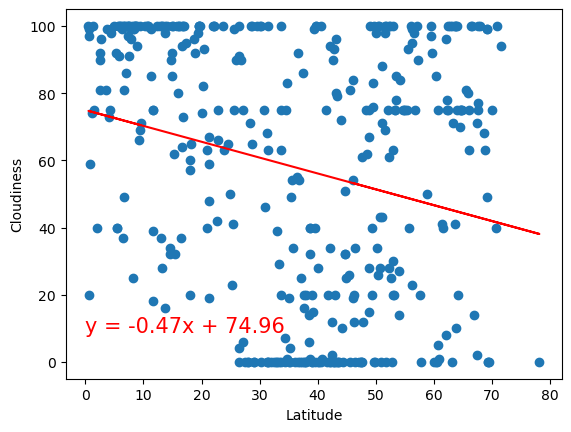

In [31]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,9),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.15685320641066744


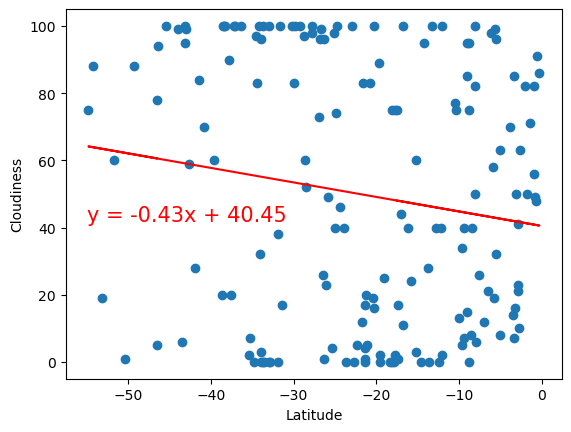

In [33]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,42),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

ANALYSIS: The linear relationship between latitude and cloudiness is pretty weak. The r-value between the two variables is close to zero and the points on each graph show no clear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13671914093624513


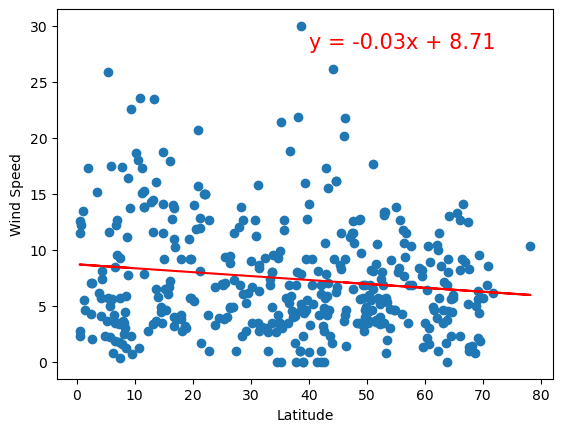

In [35]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,28),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.03721597897626862


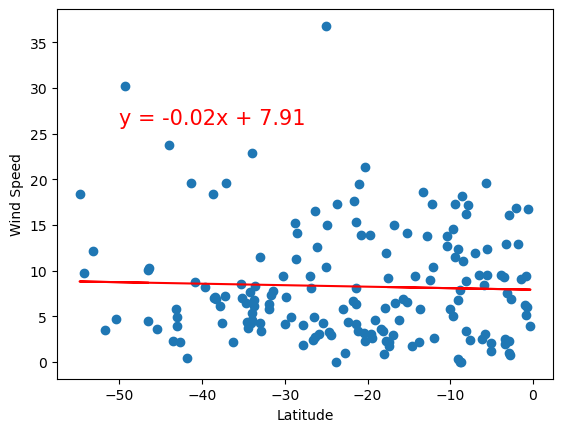

In [36]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,26),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

ANALYSIS: Latitude and wind speed have the weakest linear relationship of any two variables that we graphed in this activity. The r-value is very near 0 and the linear regression line is basically flat in both graphs.